In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = './../../data/cifar-100'
all_csvs = glob.glob(os.path.join(path, "*.csv"))

csvs = []
for file in all_csvs:
    df = pd.read_csv(file, index_col=None, header=0)
    df['filename'] = os.path.basename(file)
    csvs.append(df)
    
data = pd.concat(csvs, axis=0, ignore_index=True)
data.head()

,Unnamed: 0,annotation,batch_i,id,ordering,time,truth,ts,volunteer,filename
0,0,people,1.0,little_girl_s_001451.png,same,6.381670,people,1.578167e+09,Carson1,annotations_1.csv
1,1,people,1.0,man_s_001547.png,same,0.904250,people,1.578167e+09,Carson1,annotations_1.csv
2,2,people,1.0,cain_s_001426.png,same,0.557976,people,1.578167e+09,Carson1,annotations_1.csv
3,3,people,1.0,adam_s_000321.png,same,0.625528,people,1.578167e+09,Carson1,annotations_1.csv
4,4,household_furniture,2.0,plate_iron_s_001056.png,same,8.808181,food_containers,1.578167e+09,Carson1,annotations_1.csv


In [3]:
data['correct'] = np.where(data['annotation'] == data['truth'], 1, 0)
data.head()

,Unnamed: 0,annotation,batch_i,id,ordering,time,truth,ts,volunteer,filename,correct
0,0,people,1.0,little_girl_s_001451.png,same,6.381670,people,1.578167e+09,Carson1,annotations_1.csv,1
1,1,people,1.0,man_s_001547.png,same,0.904250,people,1.578167e+09,Carson1,annotations_1.csv,1
2,2,people,1.0,cain_s_001426.png,same,0.557976,people,1.578167e+09,Carson1,annotations_1.csv,1
3,3,people,1.0,adam_s_000321.png,same,0.625528,people,1.578167e+09,Carson1,annotations_1.csv,1
4,4,household_furniture,2.0,plate_iron_s_001056.png,same,8.808181,food_containers,1.578167e+09,Carson1,annotations_1.csv,0


In [4]:
mean_by_orderings = data.groupby(['ordering', 'volunteer'])[['time', 'correct']].mean()
mean_by_orderings

time   correct
ordering       volunteer                    
epsilon_random Carson1    4.506902  0.750000
               Carson2    4.321177  0.642857
random         Carson1    5.633682  0.555556
               Carson2    4.069458  0.869565
same           Carson1    2.715545  0.875000

(0, 25)

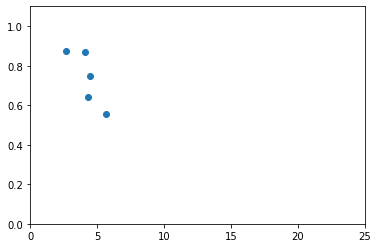

In [5]:
plt.plot(mean_by_orderings['time'], mean_by_orderings['correct'], 'o')
plt.ylim(0.0, 1.1)
plt.xlim(0,25)
